# Install PySpark

In [79]:
!sudo apt update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
#Check this site for the latest download link https://www.apache.org/dyn/closer.lua/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
!wget -q https://dlcdn.apache.org/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
!tar xf spark-3.2.1-bin-hadoop3.2.tgz
!pip install -q findspark
!pip install pyspark
!pip install py4j

import os
import sys
# os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
# os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop3.2"


import findspark
findspark.init()
findspark.find()

import pyspark

from pyspark.sql import DataFrame, SparkSession
from typing import List
import pyspark.sql.types as T
import pyspark.sql.functions as F

spark= SparkSession \
       .builder \
       .appName("Our First Spark Example") \
       .getOrCreate()

spark

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:6 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Fetched 229 kB in 2s (110 kB/s)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
45 packages can be upgraded. Run 'apt list --upgradable' to see them.
tar: spark-3.2.1-bin-hadoop3.2.tgz: Cannot open:

In [80]:
spark

# Import Data

In [132]:
df = spark.read.csv('train.csv', header = True)

In [133]:
#Viewing the dataframe schema
df.printSchema()

root
 |-- PassengerId: string (nullable = true)
 |-- Survived: string (nullable = true)
 |-- Pclass: string (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- SibSp: string (nullable = true)
 |-- Parch: string (nullable = true)
 |-- Ticket: string (nullable = true)
 |-- Fare: string (nullable = true)
 |-- Cabin: string (nullable = true)
 |-- Embarked: string (nullable = true)



In [134]:
#Summary stats
df.show()

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|  22|    1|    0|       A/5 21171|   7.25| NULL|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female|  38|    1|    0|        PC 17599|71.2833|  C85|       C|
|          3|       1|     3|Heikkinen, Miss. ...|female|  26|    0|    0|STON/O2. 3101282|  7.925| NULL|       S|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|  35|    1|    0|          113803|   53.1| C123|       S|
|          5|       0|     3|Allen, Mr. Willia...|  male|  35|    0|    0|          373450|   8.05| NULL|       S|
|          6|       0|     3|    Moran, Mr. James|  male|NULL|    0|    0|      

#EDA

In [135]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Filter the DataFrame for male passengers
male_passengers = df.filter(col("Sex") == "male")

# Filter the DataFrame for female passengers
female_passengers = df.filter(col("Sex") == "female")

# Calculate the total number of male passengers
total_male_passengers = male_passengers.count()

# Calculate the total number of female passengers
total_female_passengers = female_passengers.count()

# Calculate the number of male survivors
male_survivors = male_passengers.filter(col("Survived") == "1").count()

# Calculate the number of female survivors
female_survivors = female_passengers.filter(col("Survived") == "1").count()

# Calculate the percentage of survivors among men
male_survivor_percentage = (male_survivors / total_male_passengers) * 100

# Calculate the percentage of survivors among women
female_survivor_percentage = (female_survivors / total_female_passengers) * 100

print("Percentage of survivors among men: {:.2f}%".format(male_survivor_percentage))
print("Percentage of survivors among women: {:.2f}%".format(female_survivor_percentage))


Percentage of survivors among men: 18.89%
Percentage of survivors among women: 74.20%


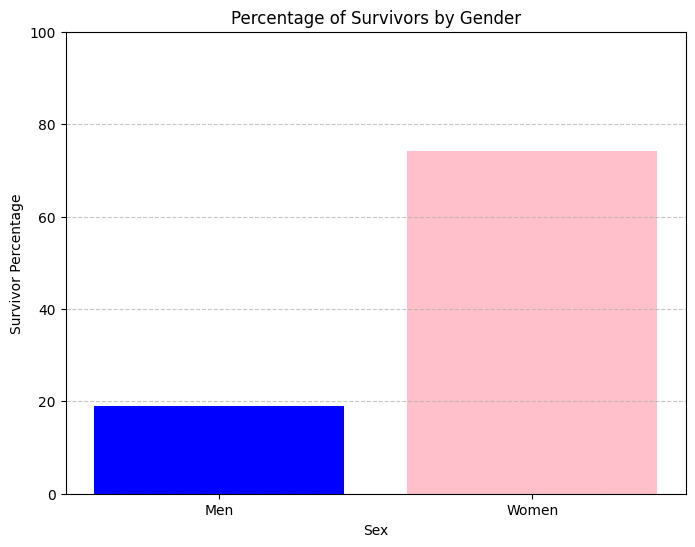

In [136]:
import matplotlib.pyplot as plt

# Data
categories = ['Men', 'Women']
percentages = [male_survivor_percentage, female_survivor_percentage]

# Plot
plt.figure(figsize=(8, 6))
plt.bar(categories, percentages, color=['blue', 'pink'])
plt.xlabel('Sex')
plt.ylabel('Survivor Percentage')
plt.title('Percentage of Survivors by Gender')
plt.ylim(0, 100)  # Set y-axis limit to 0-100%
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

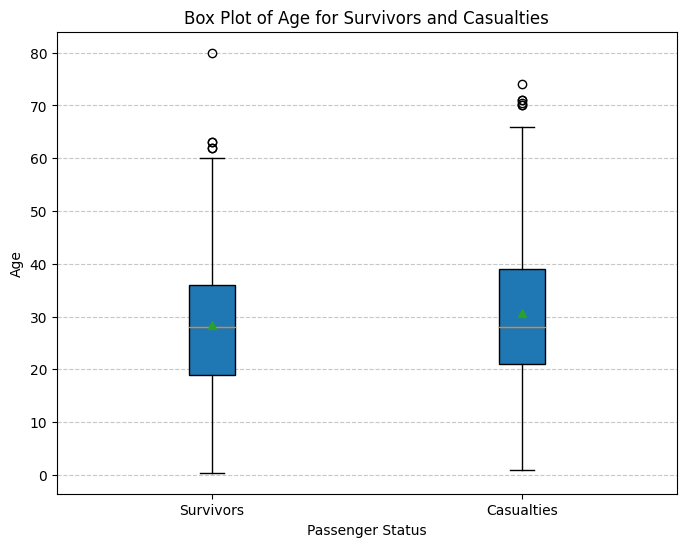

In [137]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import col

# Filter data for survivors and casualties
survivors_age = df.filter(col("Survived") == "1").select("Age").collect()
casualties_age = df.filter(col("Survived") == "0").select("Age").collect()

# Extract ages from Row objects and convert to float
survivors_age = [float(row.Age) for row in survivors_age if row.Age is not None]
casualties_age = [float(row.Age) for row in casualties_age if row.Age is not None]

# Prepare data for box plots
data = [survivors_age, casualties_age]
labels = ['Survivors', 'Casualties']

# Create box plots
plt.figure(figsize=(8, 6))
plt.boxplot(data, labels=labels, patch_artist=True, showmeans=True)
plt.xlabel('Passenger Status')
plt.ylabel('Age')
plt.title('Box Plot of Age for Survivors and Casualties')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In the casualties there are more outliers and the boxplot is longer (the age of the casualties tends to be between 66 and 1, while survivors are between 0 and 60)

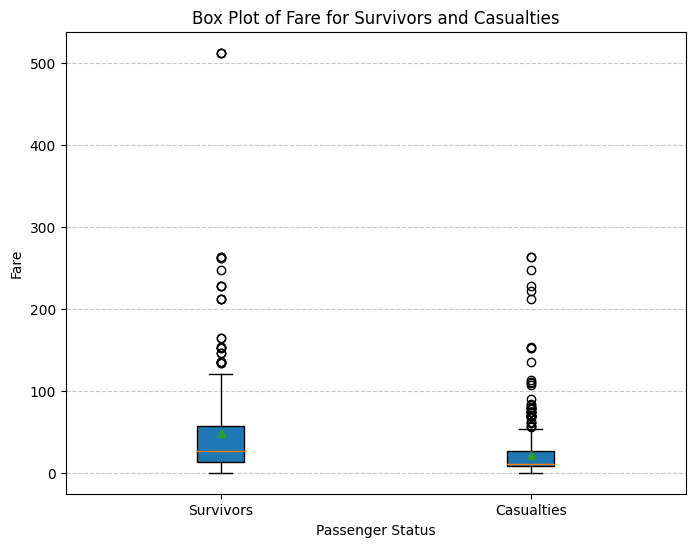

In [138]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import col

# Convert fare column to FloatType
df = df.withColumn("Fare", df["Fare"].cast("float"))

# Filter data for survivors and casualties
survivors_fare = df.filter(col("Survived") == "1").select("Fare").collect()
casualties_fare = df.filter(col("Survived") == "0").select("Fare").collect()

# Extract fares from Row objects
survivors_fare = [row.Fare for row in survivors_fare if row.Fare is not None]
casualties_fare = [row.Fare for row in casualties_fare if row.Fare is not None]

# Prepare data for box plots
data = [survivors_fare, casualties_fare]
labels = ['Survivors', 'Casualties']

# Create box plots
plt.figure(figsize=(8, 6))
plt.boxplot(data, labels=labels, patch_artist=True, showmeans=True)
plt.xlabel('Passenger Status')
plt.ylabel('Fare')
plt.title('Box Plot of Fare for Survivors and Casualties')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The casualties payed a lower fare then casualties, with some outliers in both distributions. In the survivors especially there is an extremely high 500+ fare.

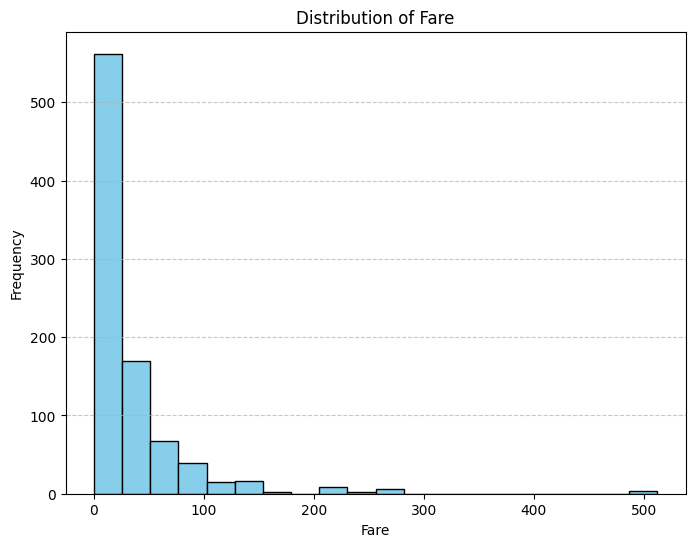

In [139]:
import matplotlib.pyplot as plt

# Extract fares from the DataFrame
fares = df.select("Fare").rdd.flatMap(lambda x: x).collect()

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(fares, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Distribution of Fare')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

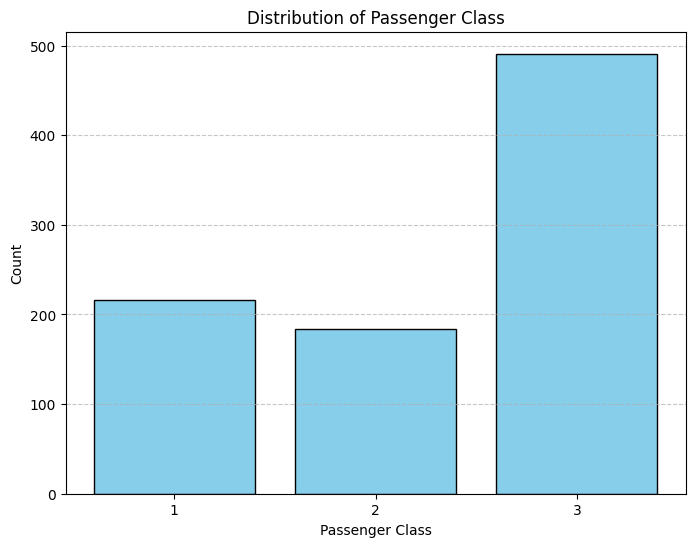

In [140]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import col

# Group the DataFrame by "Pclass" and count the number of passengers in each class
class_counts = df.groupBy("Pclass").count().orderBy("Pclass")

# Convert DataFrame to Pandas for plotting
class_counts_pd = class_counts.toPandas()

# Plot bar plot
plt.figure(figsize=(8, 6))
plt.bar(class_counts_pd["Pclass"], class_counts_pd["count"], color='skyblue', edgecolor='black')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.title('Distribution of Passenger Class')
plt.xticks(class_counts_pd["Pclass"])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Data Cleaning

In [141]:
from pyspark.sql.functions import col, isnan, when, count

# Count the number of missing values in each column
missing_values = df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns])

# Show the count of missing values
missing_values.show()

+-----------+--------+------+----+---+---+-----+-----+------+----+-----+--------+
|PassengerId|Survived|Pclass|Name|Sex|Age|SibSp|Parch|Ticket|Fare|Cabin|Embarked|
+-----------+--------+------+----+---+---+-----+-----+------+----+-----+--------+
|          0|       0|     0|   0|  0|177|    0|    0|     0|   0|  687|       2|
+-----------+--------+------+----+---+---+-----+-----+------+----+-----+--------+



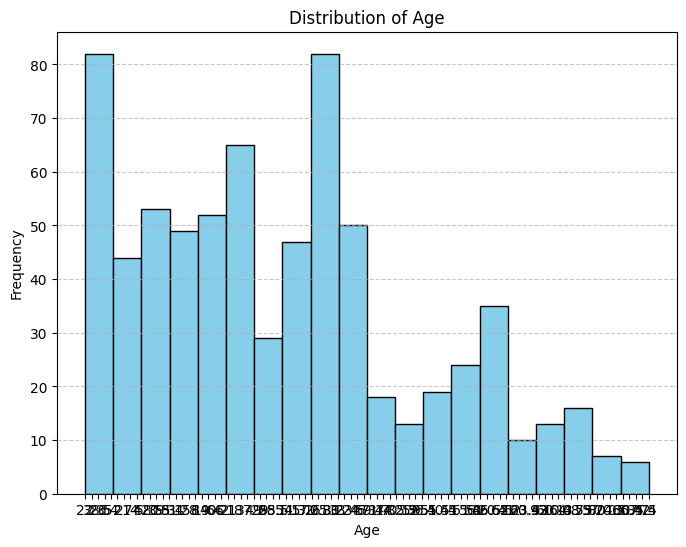

In [142]:
# Filter out null values in the Age column
age_data = df.select("Age").filter(col("Age").isNotNull()).rdd.flatMap(lambda x: x).collect()

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(age_data, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [143]:
from pyspark.sql.functions import when, median
from pyspark.sql.types import IntegerType  # Import IntegerType

# Replace missing values of Age with the median value because as we see from the
# distribution above the average might be a less representative number (weird
# distribution and outliers)
median_age = df.select(median("Age")).collect()[0][0]
df = df.withColumn("Age", when(col("Age").isNull(),(median_age)).otherwise(col("Age")))
df = df.withColumn("Age", df["Age"].cast(IntegerType()))

# Introduce a new category "Not available" for missing values of Cabin, as there are many
df = df.withColumn("Cabin", when(col("Cabin").isNull(), "Not available").otherwise(col("Cabin")))

# Drop the 2 missing observations in Embarked
df = df.dropna(subset=["Embarked"])

# Check the first few rows to verify the changes
df.show()

# Check the count of missing values to confirm
missing_values = df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns])
missing_values.show()


+-----------+--------+------+--------------------+------+---+-----+-----+----------------+-------+-------------+--------+
|PassengerId|Survived|Pclass|                Name|   Sex|Age|SibSp|Parch|          Ticket|   Fare|        Cabin|Embarked|
+-----------+--------+------+--------------------+------+---+-----+-----+----------------+-------+-------------+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male| 22|    1|    0|       A/5 21171|   7.25|Not available|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female| 38|    1|    0|        PC 17599|71.2833|          C85|       C|
|          3|       1|     3|Heikkinen, Miss. ...|female| 26|    0|    0|STON/O2. 3101282|  7.925|Not available|       S|
|          4|       1|     1|Futrelle, Mrs. Ja...|female| 35|    1|    0|          113803|   53.1|         C123|       S|
|          5|       0|     3|Allen, Mr. Willia...|  male| 35|    0|    0|          373450|   8.05|Not available|       S|
|          6|       0|  

Now we will do some feature engineering to the 'Name' column. We will extract the titles given to names (Mr, Miss etc.) and see if they have any relevance.

In [144]:
from pyspark.sql.functions import col, split

# Extract titles from the "Name" column using PySpark functions
df = df.withColumn("Title", split(split(col("Name"), ",")[1], "\.")[0].cast("string"))

# Show the count of each title
title_counts = df.groupBy("Title").count().orderBy("count", ascending=False)
title_counts.show()

+-------------+-----+
|        Title|count|
+-------------+-----+
|           Mr|  517|
|         Miss|  181|
|          Mrs|  124|
|       Master|   40|
|           Dr|    7|
|          Rev|    6|
|          Col|    2|
|         Mlle|    2|
|        Major|    2|
|         Capt|    1|
|         Lady|    1|
|     Jonkheer|    1|
|          Sir|    1|
| the Countess|    1|
|          Don|    1|
|           Ms|    1|
|          Mme|    1|
+-------------+-----+



In [145]:
from pyspark.sql.functions import col, split

# Extract titles from the "Name" column using PySpark functions and create a new column
df = df.withColumn("Title", split(split(col("Name"), ",")[1], "\.")[0].cast("string"))

# Show the DataFrame with the new "Title" column
df.show()

+-----------+--------+------+--------------------+------+---+-----+-----+----------------+-------+-------------+--------+-------+
|PassengerId|Survived|Pclass|                Name|   Sex|Age|SibSp|Parch|          Ticket|   Fare|        Cabin|Embarked|  Title|
+-----------+--------+------+--------------------+------+---+-----+-----+----------------+-------+-------------+--------+-------+
|          1|       0|     3|Braund, Mr. Owen ...|  male| 22|    1|    0|       A/5 21171|   7.25|Not available|       S|     Mr|
|          2|       1|     1|Cumings, Mrs. Joh...|female| 38|    1|    0|        PC 17599|71.2833|          C85|       C|    Mrs|
|          3|       1|     3|Heikkinen, Miss. ...|female| 26|    0|    0|STON/O2. 3101282|  7.925|Not available|       S|   Miss|
|          4|       1|     1|Futrelle, Mrs. Ja...|female| 35|    1|    0|          113803|   53.1|         C123|       S|    Mrs|
|          5|       0|     3|Allen, Mr. Willia...|  male| 35|    0|    0|          373450|

This is a lot of categories so we might group some of them together

In [146]:
from pyspark.sql.functions import regexp_replace

# Define a regular expression pattern to match the titles to be replaced
titles_to_replace = ["Capt", "Col", "Major", "Dr", "Rev"]
pattern = "|".join(titles_to_replace)

# Replace titles in the "Title" column with "Officer"
df = df.withColumn("Title", regexp_replace(col("Title"), pattern, "Officer"))

# Show the updated DataFrame
df.select("Title").distinct().show(truncate=False)


+-------------+
|Title        |
+-------------+
| Master      |
| Mrs         |
| Miss        |
| Lady        |
| Jonkheer    |
| Mr          |
| Sir         |
| the Countess|
| Mlle        |
| Officer     |
| Don         |
| Ms          |
| Mme         |
+-------------+



In [147]:
from pyspark.sql.functions import regexp_replace

# Define a regular expression pattern to match the additional titles to be replaced
additional_titles_to_replace = ["Jonkheer", "Don", "Sir", "the Countess", "Dona", "Lady"]
additional_pattern = "|".join(additional_titles_to_replace)

# Replace additional titles in the "Title" column with "Noble"
df = df.withColumn("Title", regexp_replace(col("Title"), additional_pattern, "Noble"))

# Show the updated DataFrame
df.select("Title").distinct().show(truncate=False)

+--------+
|Title   |
+--------+
| Master |
| Mrs    |
| Noble  |
| Miss   |
| Mr     |
| Mlle   |
| Officer|
| Ms     |
| Mme    |
+--------+



In [148]:
from pyspark.sql.functions import regexp_replace

# Define a dictionary to map titles to their replacements
title_replacements = {
    "Mme": "Mrs",
    "Ms": "Mrs",
    "Mlle": "Miss"
}

# Iterate over the dictionary and replace titles in the "Title" column
for old_title, new_title in title_replacements.items():
    df = df.withColumn("Title", regexp_replace(col("Title"), old_title, new_title))

# Show the updated DataFrame
df.select("Title").distinct().show(truncate=False)

+--------+
|Title   |
+--------+
| Master |
| Mrs    |
| Noble  |
| Miss   |
| Mr     |
| Officer|
+--------+



now we will clean drop Name, Ticket and PassengerId

In [150]:
# Drop the "Name" and "Ticket" columns
df = df.drop("Name", "Ticket", "PassengerId")

In [151]:
df.show()

+--------+------+------+---+-----+-----+-----+-------------+--------+-------+
|Survived|Pclass|   Sex|Age|SibSp|Parch| Fare|        Cabin|Embarked|  Title|
+--------+------+------+---+-----+-----+-----+-------------+--------+-------+
|       0|     3|  male| 22|    1|    0| 7.25|Not available|       S|     Mr|
|       1|     1|female| 38|    1|    0|71.28|          C85|       C|    Mrs|
|       1|     3|female| 26|    0|    0| 7.93|Not available|       S|   Miss|
|       1|     1|female| 35|    1|    0|53.10|         C123|       S|    Mrs|
|       0|     3|  male| 35|    0|    0| 8.05|Not available|       S|     Mr|
|       0|     3|  male| 28|    0|    0| 8.46|Not available|       Q|     Mr|
|       0|     1|  male| 54|    0|    0|51.86|          E46|       S|     Mr|
|       0|     3|  male|  2|    3|    1|21.08|Not available|       S| Master|
|       1|     3|female| 27|    0|    2|11.13|Not available|       S|    Mrs|
|       1|     2|female| 14|    1|    0|30.07|Not available|    

Now we proceed treating the outliers in Fare.

Note: i will not treat outliers in Age as they are few and also seem like true values (e.g. 70 year olds are outliers but it's a normal age)

To treat the outliers in Fare i decided to replace values above 500 (definetly too high) with the next highest values, in order to have really high fare, which is still telling us that those passegers were wealthy and were probably in first class

In [170]:
from pyspark.sql.functions import when

# Replace values above 200 in the "Fare" column with 150
df = df.withColumn("Fare", when(col("Fare") > 200, 150).otherwise(col("Fare")))

# Show the updated DataFrame
df.select("Fare").show()

+-----+
| Fare|
+-----+
| 7.25|
|71.28|
| 7.93|
| 53.1|
| 8.05|
| 8.46|
|51.86|
|21.08|
|11.13|
|30.07|
| 16.7|
|26.55|
| 8.05|
|31.27|
| 7.85|
| 16.0|
|29.12|
| 13.0|
| 18.0|
| 7.22|
+-----+
only showing top 20 rows



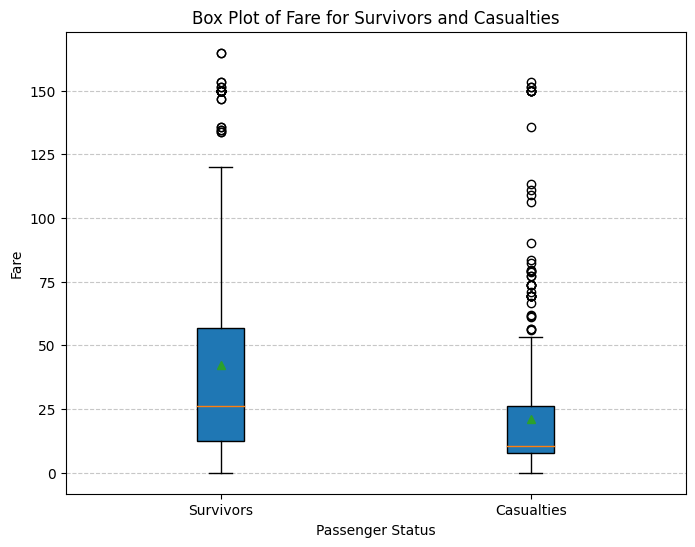

In [171]:
# Convert fare column to FloatType
df = df.withColumn("Fare", df["Fare"].cast("float"))

# Filter data for survivors and casualties
survivors_fare = df.filter(col("Survived") == "1").select("Fare").collect()
casualties_fare = df.filter(col("Survived") == "0").select("Fare").collect()

# Extract fares from Row objects
survivors_fare = [row.Fare for row in survivors_fare if row.Fare is not None]
casualties_fare = [row.Fare for row in casualties_fare if row.Fare is not None]

# Prepare data for box plots
data = [survivors_fare, casualties_fare]
labels = ['Survivors', 'Casualties']

# Create box plots
plt.figure(figsize=(8, 6))
plt.boxplot(data, labels=labels, patch_artist=True, showmeans=True)
plt.xlabel('Passenger Status')
plt.ylabel('Fare')
plt.title('Box Plot of Fare for Survivors and Casualties')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

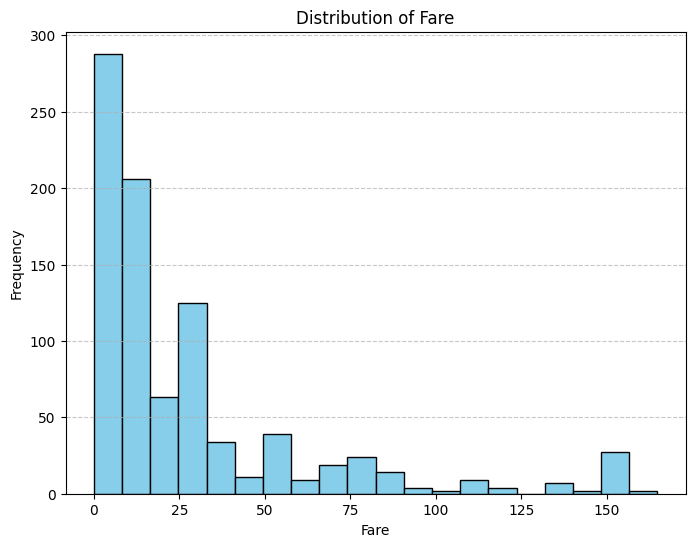

In [172]:
import matplotlib.pyplot as plt

# Extract fares from the DataFrame
fares = df.select("Fare").rdd.flatMap(lambda x: x).collect()

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(fares, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Distribution of Fare')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

now we will clean Fare, to have all observations in the same format (2 decimals)

In [173]:
from pyspark.sql.functions import format_number

# Clean the "Fare" column to have two decimal places
df = df.withColumn("Fare", format_number(col("Fare"), 2))

# Show the cleaned "Fare" column
df.select("Fare").show()

+-----+
| Fare|
+-----+
| 7.25|
|71.28|
| 7.93|
|53.10|
| 8.05|
| 8.46|
|51.86|
|21.08|
|11.13|
|30.07|
|16.70|
|26.55|
| 8.05|
|31.27|
| 7.85|
|16.00|
|29.12|
|13.00|
|18.00|
| 7.22|
+-----+
only showing top 20 rows

